## Diabetes Risk Prediction - Starter Notebook

In [10]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [12]:
# 2. Load the Dataset
df = pd.read_csv('./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
#3. Data Cleaning
# Replace zeroes with NaN for specific columns where 0 is not a valid value
cols_with_zero_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero_as_missing] = df[cols_with_zero_as_missing].replace(0, np.nan)


In [16]:
# Check how many missing values we have
df.isnull().sum()

# Impute missing values with median
df.fillna(df.median(), inplace=True)



Diabetes Outcome Value Counts:
Outcome
0    500
1    268
Name: count, dtype: int64


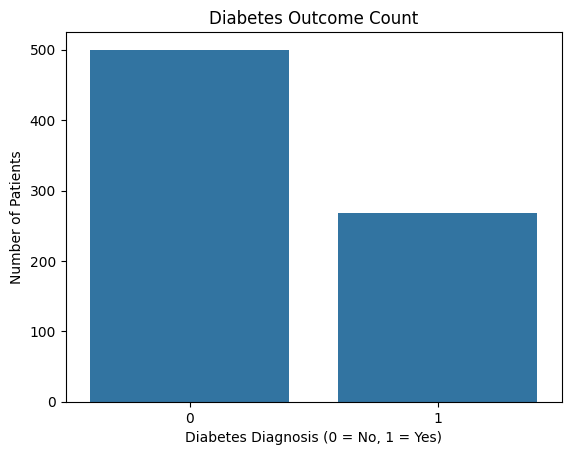

In [17]:
# 4. Exploratory Data Analysis (EDA)
# Count of diabetic (1) and non-diabetic (0) patients
print("Diabetes Outcome Value Counts:")
print(df['Outcome'].value_counts())

sns.countplot(x='Outcome', data=df)
plt.title('Diabetes Outcome Count')
plt.xlabel('Diabetes Diagnosis (0 = No, 1 = Yes)')
plt.ylabel('Number of Patients')
plt.show()


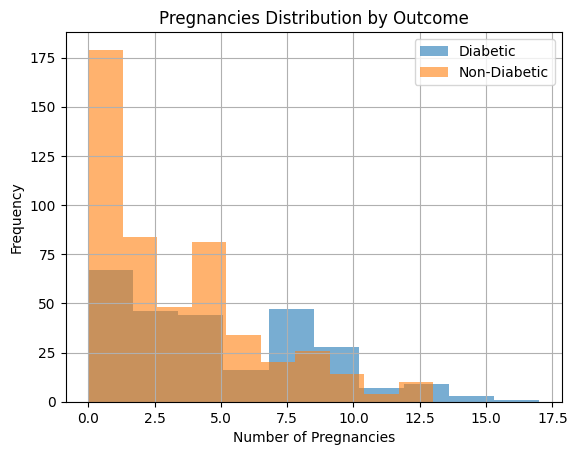

In [18]:
# Example: Distribution of pregnancies
df[df['Outcome'] == 1]['Pregnancies'].hist(alpha=0.6, label='Diabetic')
df[df['Outcome'] == 0]['Pregnancies'].hist(alpha=0.6, label='Non-Diabetic')
plt.legend()
plt.title('Pregnancies Distribution by Outcome')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Frequency')
plt.show()


In [19]:
# 5. Feature Scaling
X = df.drop('Outcome', axis=1)
y = df['Outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [21]:
# 7. Model Training and Evaluation
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("\nLogistic Regression Results:")
print(classification_report(y_test, y_pred_log))



Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [22]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



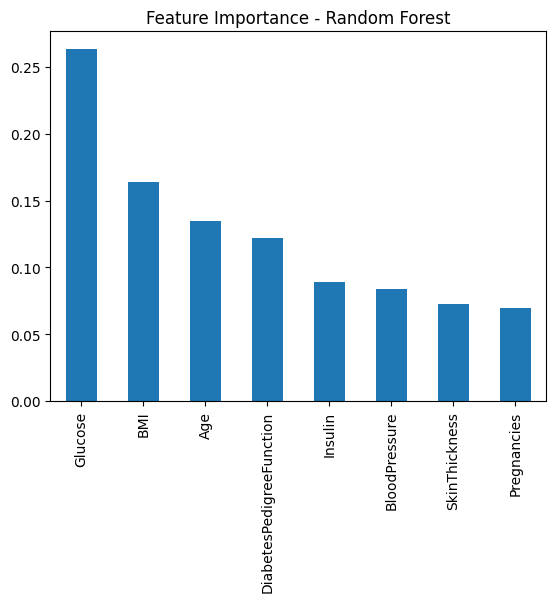

In [23]:
# 8. Feature Importance from Random Forest
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance - Random Forest')
plt.show()

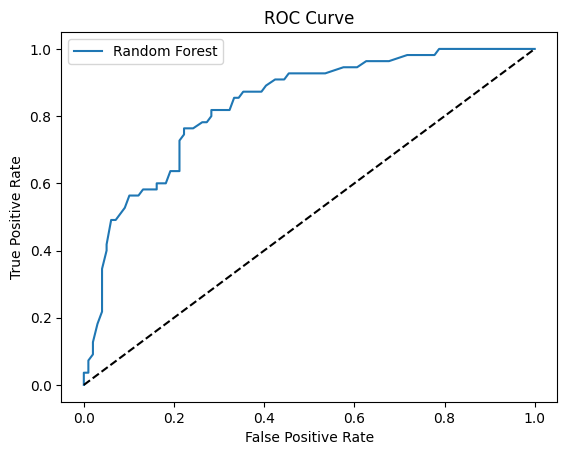

In [24]:
# 9. ROC Curve for Best Model
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

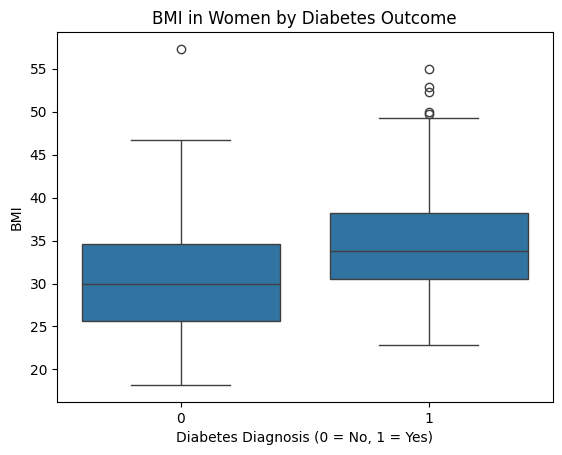

In [25]:
# 10. Women-Focused Insight
# Example: Compare BMI between diabetic and non-diabetic women (Pregnancies > 0)
df_women = df[df['Pregnancies'] > 0]
sns.boxplot(x='Outcome', y='BMI', data=df_women)
plt.title('BMI in Women by Diabetes Outcome')
plt.xlabel('Diabetes Diagnosis (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.show()